# Caso Práctico: Neurona de McCulloch y Pitts

## 1. Implementación de la MPNeuron

In [1]:
import numpy as np
class MPNeuron:
    def _inti_(self): #Atributo de la clase
        self.threshold = None
        
    def model(self, x): #Metodo de la clase
        # input: [1,0,1,0] [x1, x2, x3, x4]
        z = sum(x)
        return (z >= self.threshold) # Funcion de activacion 
    
    def predict(self, X):
        # input [[1,0,1,0],[1,0,1,1]]
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    

In [2]:
# Instanciamos la neurona
mp_neuron = MPNeuron()

In [3]:
# Establecemos un threshold
mp_neuron.threshold = 3

In [4]:
# Evaluamos diferentes casos de uso
mp_neuron.predict([[1, 0, 0, 0],[1, 1, 1, 1],[1, 1, 1, 0]])

array([False,  True,  True])

## 2. Aplicando la MPNeuron a un caso práctico real

### 2.1. Conjunto de datos

Esta es una copia de los conjuntos de datos de UCI ML Breast Cancer Wisconsin (Diagnóstico). https://goo.gl/U2Uwz2

Las caracteríaticas de entrada se calculan a partir de una imagen digitalizada de un aspirado de aguja (FNA) de una masa maria. Describen las características de los núcleos celulares presentes en la imagen.

Esta base de datos también está disponible a través del servidos ftp UW CS:

ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

### 2.2. Lectura del conjunto de datos

In [5]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer.data
Y = breast_cancer.target

In [6]:
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### 2.3. Visualización del conjunto de datos

In [7]:
import pandas as pd

df = pd.DataFrame(X, columns = breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 2.4. División del conjunto de datos

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, Y, stratify = Y)

print("Tamaño del conjunto de datos de entrenamiento: ", len(X_train))
print("Tamaño del conjunto de datos de pruebas: ", len(X_test))

Tamaño del conjunto de datos de entrenamiento:  426
Tamaño del conjunto de datos de pruebas:  143


### 2.5. Implementlación de una MPNeuron más avanzada

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score

class MPNeuron:
    
    def __init__(self):
        self.threshold = None
        
    def model(self, x):
        return (sum(x) >= self.threshold)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        # Seleccionamos un threshold entre el # de características de entrada
        for th in range(X.shape[1] + 1):
            self.threshold = th
            Y_pred = self.predict(X)
            accuracy[th] = accuracy_score(Y_pred, Y)
        # Seleccionamos el threshold que mejores resultados proporciona
        self.threshold = max(accuracy, key=accuracy.get)


Seguimos teniendo un problema debido a que en nuestro conjunto de datos las características de entrada reciben valores continuos, sin embargo, nuestra MPNeuron solo procesa caracteristicas de entrada con valor binario

[0, 0, 1, 1, 1, 0, 0]
Categories (2, int64): [0 < 1]


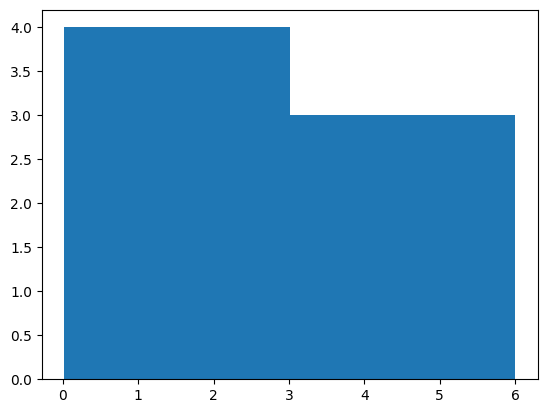

In [10]:
# Para transformar un valor a binario
import matplotlib.pyplot as plt

print(pd.cut([0.04,2,4,5,6,0.02,0.6],bins = 2, labels = [0,1]))

plt.hist([0.04,0.3,4,5,6,0.02,0.6],bins=2)
plt.show()

In [11]:
# Transformamos las características de entrada a un valor binario
X_train_bin = X_train.apply(pd.cut, bins = 2, labels = [1,0])
X_test_bin = X_test.apply(pd.cut, bins=2, labels=[1,0])

X_train_bin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
289,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
319,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
566,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
234,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
401,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
487,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,1,1,1,0,1,1
384,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
328,1,1,1,1,0,1,1,1,1,1,...,1,0,1,1,0,1,1,0,1,1


In [12]:
# Instanciamos el modelo MPNeuron
mp_neuron = MPNeuron()

# Encontramos el threshold óptimo
mp_neuron.fit(X_train_bin.to_numpy(), y_train)

In [13]:
# Threshold óptimo seleccionado
mp_neuron.threshold

28

In [14]:
# Realizamos predicciones para ejemplos nuevos que no se encuentran en el conjunto de datos de entrenamiento
Y_pred = mp_neuron.predict(X_test_bin.to_numpy())

In [15]:
# Calculamos la exactitud de nuestra prediccion
accuracy_score(y_test, Y_pred)

0.8461538461538461

In [16]:
# Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, Y_pred)

array([[48,  5],
       [17, 73]], dtype=int64)